# Plotting with matplotlib 2

In the last lecture we got familiar with matplotlib and used it to plot some various kinds of charts. In the last example, we tried to use many options in matplotlib to make the chart exactly as we want.

In this lecture, we will learn more ways on how to dictate the look of the chart. We will also learn how to use object oriented style of matplotlib, which can be used to write reusable functions to create charts.

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## Style sheets

Matplotlib allows the user to define style sheets, which defines many visual properties of the chart (like fonts, colors, etc.). Not only that, it ships with many predefined styles, many of which are more elegant that the default look (to my eye, at least).

Let's look at how to use them.

### Data

This is the data containing the details of the reponse of the SF fire department to an emergency. Each row is for one specific response.

We want to measure the distribution of response time of the SF fire department.

In [3]:
df = pd.read_csv('fd_calls_short.csv', parse_dates=[5,9])
df.head(5)

/home/aman/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Call Number,Unit ID,Incident Number,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,On Scene DtTm,...,ALS Unit,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Location,Neighborhooods - Analysis Boundaries,RowID
0,180543290,T01,18023190,02/23/2018,02/23/2018,2018-02-23 18:55:05,02/23/2018 06:56:29 PM,02/23/2018 06:57:08 PM,02/23/2018 06:57:13 PM,2018-02-23 19:00:23,...,False,Alarm,1,TRUCK,1,3,6,"(37.783430170318, -122.398387591798)",Financial District/South Beach,180543290-T01
1,163231853,RS1,16128936,11/18/2016,11/18/2016,2016-11-18 12:40:17,11/18/2016 12:41:14 PM,11/18/2016 12:41:36 PM,11/18/2016 12:43:25 PM,2016-11-18 12:45:31,...,False,Potentially Life-Threatening,1,RESCUE SQUAD,1,3,6,"(37.775420706711, -122.403404791479)",South of Market,163231853-RS1
2,173303060,T10,17138693,11/26/2017,11/26/2017,2017-11-26 21:20:49,11/26/2017 09:22:20 PM,11/26/2017 09:22:35 PM,11/26/2017 09:23:35 PM,NaT,...,False,Alarm,1,TRUCK,3,5,2,"(37.784909159111, -122.452936292976)",Presidio Heights,173303060-T10
3,191053189,E05,19044747,04/15/2019,04/15/2019,2019-04-15 17:51:17,04/15/2019 05:51:17 PM,04/15/2019 05:52:21 PM,04/15/2019 05:52:21 PM,2019-04-15 17:53:31,...,False,Potentially Life-Threatening,1,ENGINE,2,2,8,"(37.76956852749686, -122.42240555639769)",Mission,191053189-E05
4,183283685,77,18137922,11/24/2018,11/24/2018,2018-11-24 22:24:29,11/24/2018 10:25:15 PM,11/24/2018 10:26:30 PM,11/24/2018 10:27:00 PM,2018-11-24 22:27:37,...,True,Potentially Life-Threatening,1,MEDIC,1,4,3,"(37.789883351367, -122.418012422783)",Nob Hill,183283685-77


In [5]:
df['response_time_min'] = (df['On Scene DtTm'] - df['Received DtTm']).astype(int)/(1000000000 * 60)

In [6]:
df_response_tm = df[['Incident Number', 'response_time_min']]
df_response_tm = df_response_tm[(df_response_tm['response_time_min'] > 0) & (df_response_tm['response_time_min'] < 60)]
df_response_tm.head(10)

,Incident Number,response_time_min
0,18023190,5.300000
1,16128936,5.233333
3,19044747,2.233333
4,18137922,3.133333
5,17047835,5.600000
6,17110468,16.600000
8,18090456,7.183333
9,16025845,11.266667
10,18126014,3.816667
11,19050609,18.500000


### Pre-defined style sheets

As mentioned before, matplotlib ships with many different style sheets. The list of all styles that are available can be seen using the following variable in the `plt.style` package.

In [7]:
print(plt.style.available)

['_classic_test', 'seaborn-dark', 'Solarize_Light2', 'grayscale', 'seaborn-poster', 'fast', 'seaborn-bright', 'classic', 'seaborn-darkgrid', 'seaborn-notebook', 'seaborn-whitegrid', 'seaborn-pastel', 'seaborn-ticks', 'bmh', 'fivethirtyeight', 'seaborn-paper', 'seaborn-dark-palette', 'seaborn-colorblind', 'tableau-colorblind10', 'seaborn-deep', 'seaborn-muted', 'seaborn-white', 'ggplot', 'dark_background', 'seaborn-talk', 'seaborn']


We can use the function `plt.style.use()` to change the style. This changes the default setting, so all plots created once that has been called will use that style.

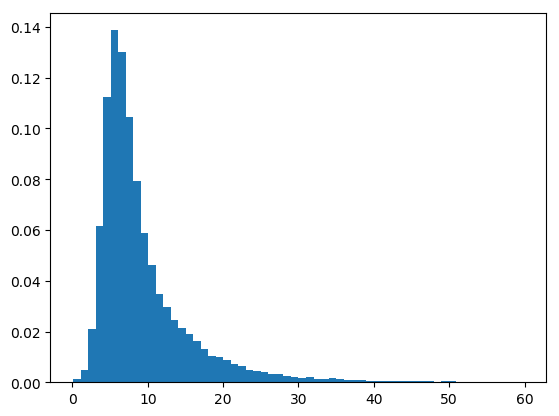

In [9]:
# The string 'default' is used for the default matplotlib style
plt.style.use('default')
plt.hist('response_time_min', bins=60, density=1, data=df_response_tm)
plt.show()

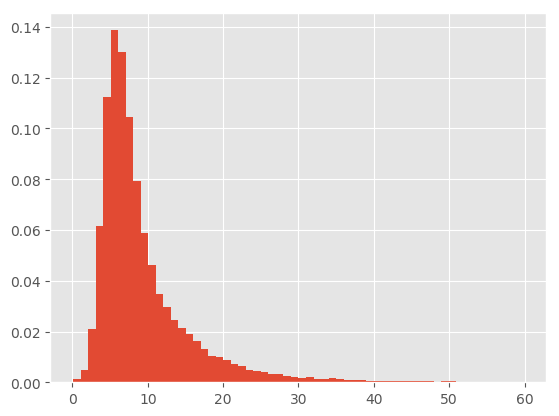

In [11]:
# The following syntax allows you to apply the style only for one plot at a time
# while keeping the global defaults same.


# This style imitates the style of R language plots
with plt.style.context('ggplot'):
    plt.hist('response_time_min', bins=60, density=1, data=df_response_tm)
plt.show()

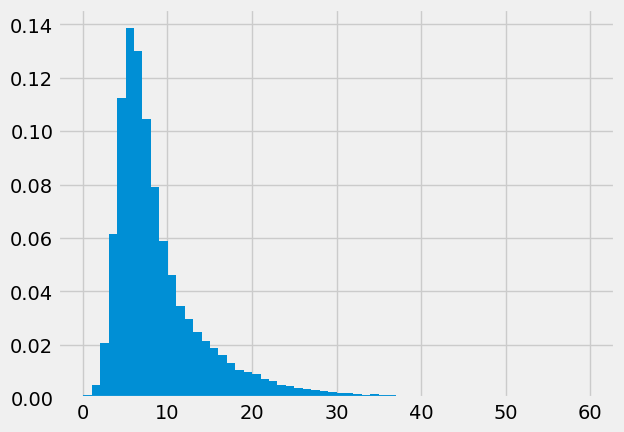

In [13]:
# This style imitates the charts used by popular site fivethirtyeight.com

with plt.style.context('fivethirtyeight'):
    plt.hist('response_time_min', bins=60, density=1, data=df_response_tm)
plt.show()

### Exercise

Try as many styles as you can and choose one which you like the best for this chart.

## Custom styling

You can specify style parameters which can override the default. You can also group those parameters and give them a name, which you can use like pre-built style sheets in the last section. We will look at how to do both.

### rcParams

`matplotlib` maintains a global dictionary called `rcParams` which defines the default style settings. To change a few settings, (like background color or font), we can change that dictionary, and all plots will use those updated style.

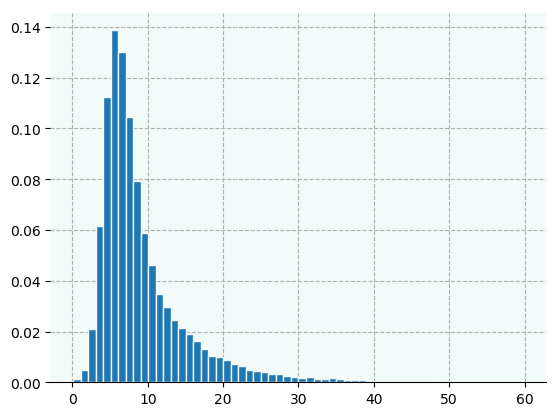

In [30]:
bgcolor = (0.95, 0.98, 0.98)
mpl.rcParams['axes.facecolor'] = bgcolor
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.grid.axis'] = 'both'             
mpl.rcParams['axes.grid.which'] = 'major'
mpl.rcParams['axes.axisbelow'] = True
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['patch.edgecolor'] = bgcolor
mpl.rcParams['patch.force_edgecolor'] = True

plt.hist('response_time_min', bins=60, density=1, data=df_response_tm)
plt.show()

As you can see above, after changing a number of key value pairs in `rcParams` dictionary, we have our own look of the plot. 

Let's create another plot, and see how that chart looks like with this style.

In [31]:
df['call_month'] = df['Received DtTm'].apply(lambda x: x.month)
df_calls_month = df.groupby(['call_month'])['Incident Number'].count()

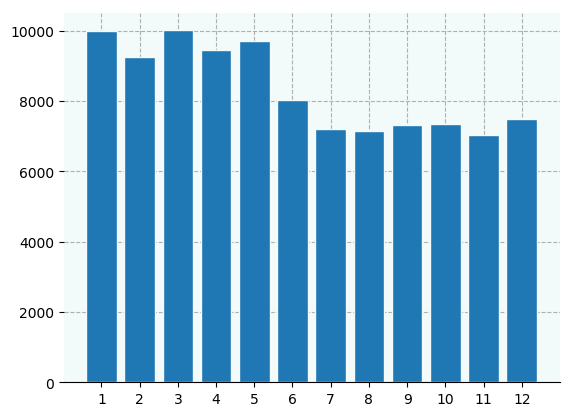

In [32]:
plt.bar(df_calls_month.index, df_calls_month.values)
plt.xticks(range(1,13))
plt.show()

In the previous section, we learnt about `plt.style.use()` function. That function actually works this way:
- the style name is attached to a number of key value pairs to define the style.
- when we call `plt.style.use()`, the `rcParams` dictionary is updated to use the values from that style.

Thus, `rcParams` is the main mechanism in matplotlib to define the default style of the charts.

Try going back to the previous section (like where we used the `ggplot` style), and run that cell again. You will note that the chart looks different - the bars are separated. This is because `ggplot` style doesn't overwrite the `patch.force_edgecolor` setting, and since we set it true in this section, every chart will have an edge line around bars in the charts.

### Custom style sheets

To create custom style sheets, one can **create a file** which sets the style settings in a similar way to how we set the `rcParams` above. Here is an example of the contents of such a file:

```
axes.spines.left : False
axes.spines.right : False
axes.spines.top : False
axes.grid : True
axes.grid.axis : both             
axes.grid.which : major
axes.axisbelow : True
grid.linestyle : --
patch.facecolor : red
```

I saved this file as `main.mplstyle`. 
- We can use the same functions as before (either `plt.style.use()` or `plt.style.context()`) to refer to our style sheet file, and that style will get loaded.
- You can specify a list of styles, instead of just one (this works with pre-built styles as well). Note that if a property overlaps between style sheets, the latter style will override the earlier one.

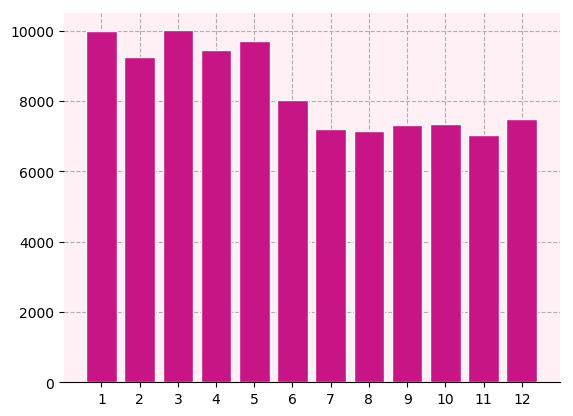

In [33]:
with plt.style.context(['bgcolor.mplstyle', 'main.mplstyle']):
    plt.bar(df_calls_month.index, df_calls_month.values, color='mediumvioletred')
    plt.xticks(range(1,13))
plt.show()

### Useful reference links

- [This link is useful](https://matplotlib.org/tutorials/introductory/customizing.html#a-sample-matplotlibrc-file) for future reference - it provides a very large list of settings that you can use to define your chart style.

- [This link](https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib) lists all the names of colors that you can use in matplotlib, if you don't want to use RGB based colors.

### Exercise

**Step 1:**
Create a chart which is a stacked area plot showing the number of incidents each month for each `Unit Type`. It's similar to the column chart above, but:
- For each month, we can find out how many incidents occured for each Unit Type.
- It will be a stacked area plot, and not a stacked column chart.

**Step 2:**
Define your own style sheet which uses the following image as inspiration. Take care of the following:
- Color of lines and areas. Look at `axes.prop_cycle` property at the reference link above.
- Transparency of area colors
- Background color inside the chart boundary
- Background color outside the chart boundary
- Dot style
- Grid style
- Font type, name and color
- Placement of axis labels and title
- Legend style
- Spines
- X and Y axis ticks

![Sample image](https://raw.githubusercontent.com/amangup/data-analysis-bootcamp/master/11-Matplotlib2/chart.jpg)
